
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MAILA\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\MAILA\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


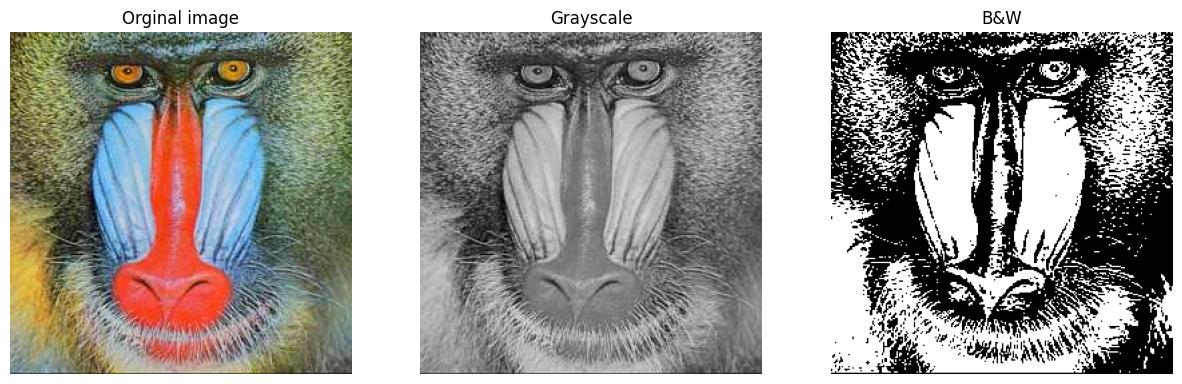

In [4]:

!pip install matplotlib
!pip install opencv-python


import cv2
import matplotlib.pyplot as plt


image_path = 'C:/Users/MAILA/Desktop/img.jpg'  
color_image = cv2.imread(image_path)


color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)


gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(color_image_rgb)
plt.title('Orginal image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('B&W')
plt.axis('off')

plt.show()


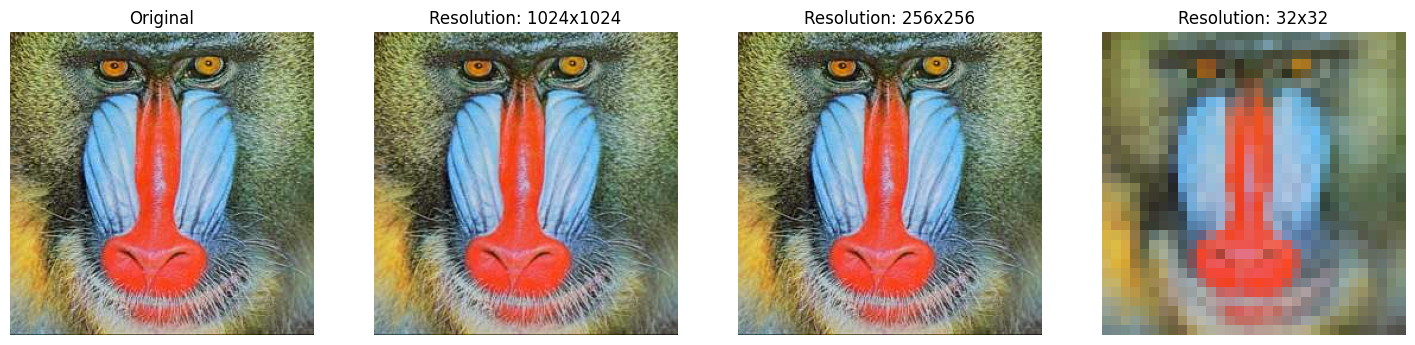

In [5]:


import cv2
import matplotlib.pyplot as plt


image_path = 'C:/Users/MAILA/Desktop/img.jpg'  
original_image = cv2.imread(image_path)


original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)


image_1024 = cv2.resize(original_image_rgb, (1024, 1024), interpolation=cv2.INTER_AREA)
image_256 = cv2.resize(original_image_rgb, (256, 256), interpolation=cv2.INTER_AREA)
image_32 = cv2.resize(original_image_rgb, (32, 32), interpolation=cv2.INTER_AREA)


plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(original_image_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image_1024)
plt.title('Resolution: 1024x1024')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(image_256)
plt.title('Resolution: 256x256')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image_32)
plt.title('Resolution: 32x32')
plt.axis('off')

plt.show()


Enter Cordinates (x, y):


points 1:  10, 10
points 2:  10, 100
points 3:  200, 200
points 4:  400, 400
points 5:  20, 300


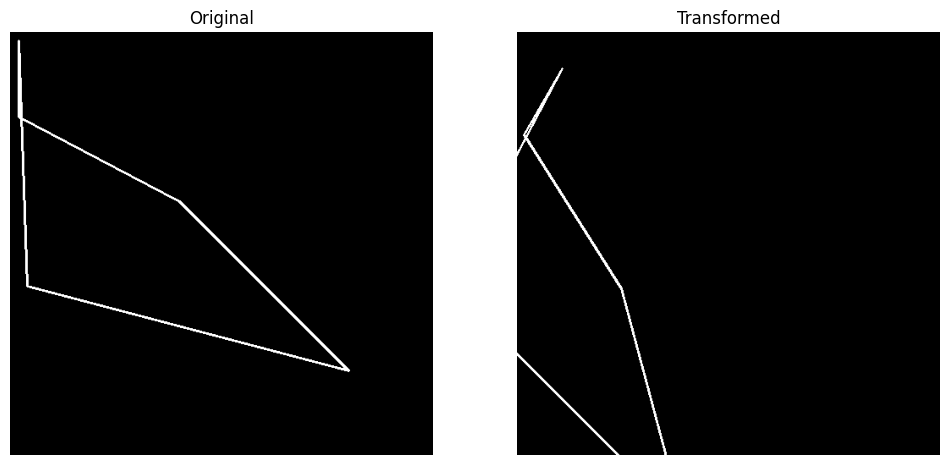

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def draw_polygon(points, title='Polygon'):
    image = np.zeros((500, 500, 3), dtype=np.uint8)
    points = points.astype(np.int32).reshape((-1, 1, 2))  
    cv2.polylines(image, [points], isClosed=True, color=(255, 255, 255), thickness=2)
    return image


points = []
print("Enter Cordinates (x, y):")
for i in range(5):
    x, y = map(int, input(f"points {i+1}: ").split(','))
    points.append([x, y])
points = np.array(points, dtype=np.float32)


original_image = draw_polygon(points, 'Original')


angle = np.radians(30) 
cos_angle = np.cos(angle)
sin_angle = np.sin(angle)


affine_matrix = np.array([
    [cos_angle, -sin_angle, 50], 
    [sin_angle, cos_angle, 30] 
], dtype=np.float32)


transformed_points = cv2.transform(np.array([points]), affine_matrix)[0]


transformed_image = draw_polygon(transformed_points, 'Transformed')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title('Transformed')
plt.axis('off')

plt.show()


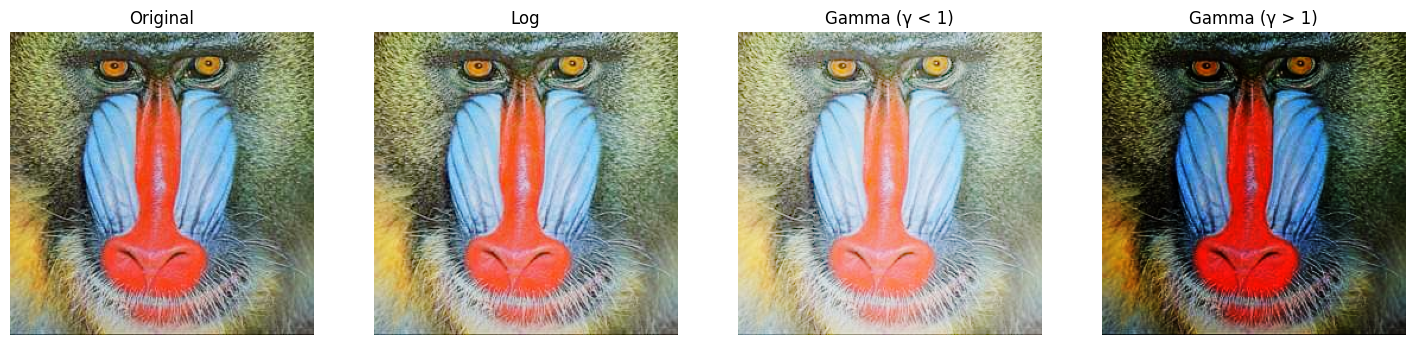

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def apply_log_transform(image):

    image_float = image.astype(np.float32) / 255.0
    log_image = np.log1p(image_float)  
    log_image = (log_image / np.max(log_image) * 255).astype(np.uint8)  
    return log_image


def apply_gamma_transform(image, gamma):

    image_float = image.astype(np.float32) / 255.0
    gamma_image = np.power(image_float, gamma)
    gamma_image = (gamma_image * 255).astype(np.uint8)  
    return gamma_image


image_path = 'C:/Users/MAILA/Desktop/img.jpg'  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


log_image = apply_log_transform(image_rgb)
gamma_image_less_than_1 = apply_gamma_transform(image_rgb, 0.5)  
gamma_image_more_than_1 = apply_gamma_transform(image_rgb, 2.0)  


plt.figure(figsize=(18, 10))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(log_image)
plt.title('Log')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gamma_image_less_than_1)
plt.title('Gamma (γ < 1)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gamma_image_more_than_1)
plt.title('Gamma (γ > 1)')
plt.axis('off')

plt.show()


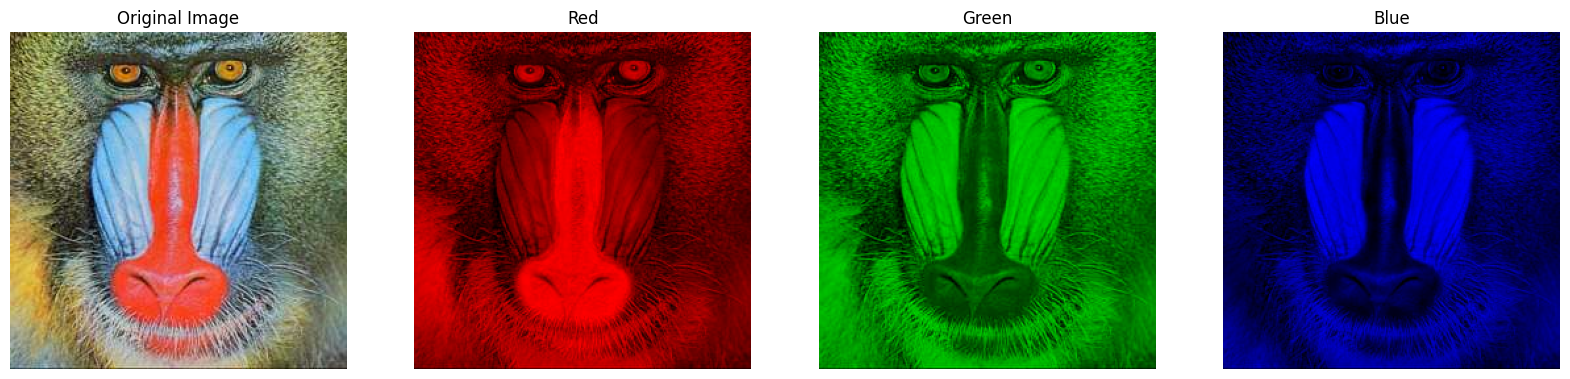

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'C:/Users/MAILA/Desktop/img.jpg' 
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 


red_channel = image_rgb[:, :, 0] 
green_channel = image_rgb[:, :, 1]  
blue_channel = image_rgb[:, :, 2] 


red_image = np.zeros_like(image_rgb)
red_image[:, :, 0] = red_channel

green_image = np.zeros_like(image_rgb)
green_image[:, :, 1] = green_channel

blue_image = np.zeros_like(image_rgb)
blue_image[:, :, 2] = blue_channel


plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_image)
plt.title('Red')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_image)
plt.title('Green')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_image)
plt.title('Blue')
plt.axis('off')

plt.show()
